<a href="https://colab.research.google.com/github/Ahmed-Yasser-El-Sharkawy/Diabetes-Prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libarary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
# Import label encoder
from sklearn.preprocessing import LabelEncoder
# Neural Network
import tensorflow as tf
from keras.models import Sequential , load_model
from keras.layers import Dense , Dropout , Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Data

In [3]:
df=pd.read_csv('drive/My Drive/Data/diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [9]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#Data Visalustion

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

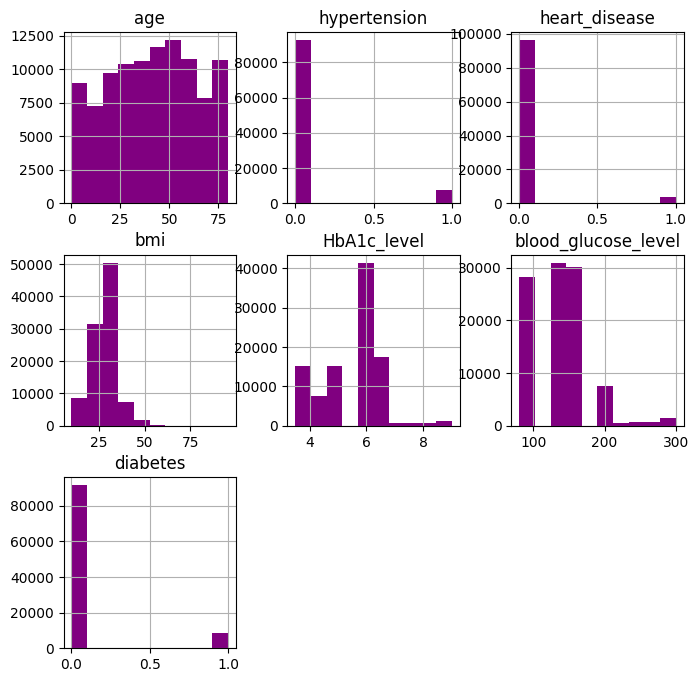

In [11]:
df.hist(figsize=(8,8), color='purple')


<ipython-input-12-0ae45bf99852>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df ,palette='magma' ,ax=ax[0])


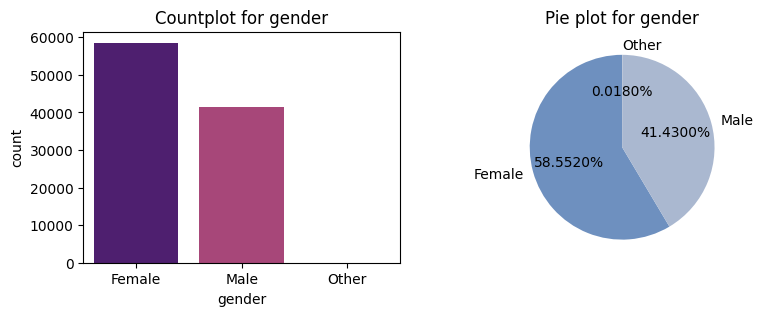

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=df['gender'],data=df ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for gender')
# Pie plot
data_counts = df['gender'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for gender')
plt.show()

<ipython-input-13-bf4136655c80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hypertension'],data=df ,palette='magma' ,ax=ax[0])


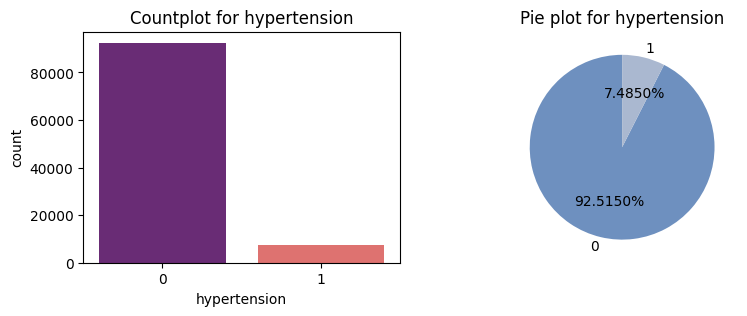

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=df['hypertension'],data=df ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for hypertension')
# Pie plot
data_counts = df['hypertension'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for hypertension')
plt.show()

<ipython-input-14-8e2e9e79f07e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['smoking_history'],data=df,palette='magma' ,ax=ax[0])


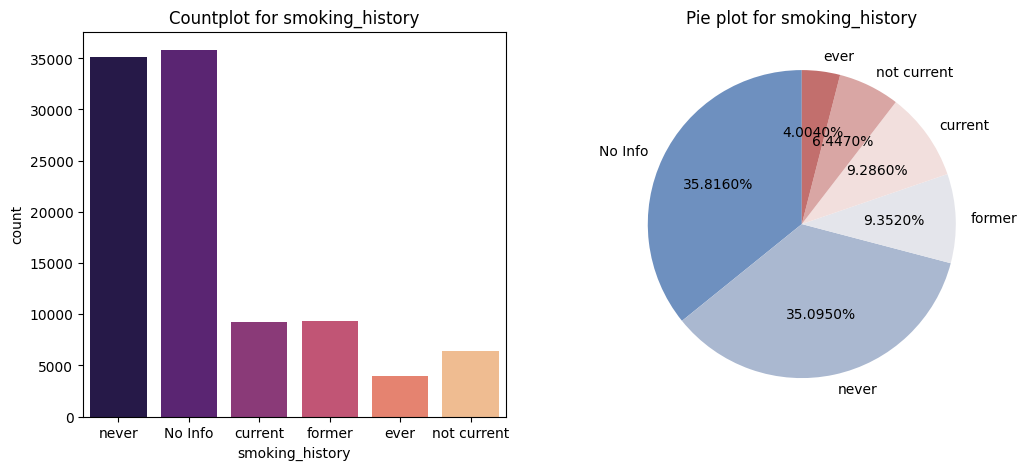

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Countplot
sns.countplot(x=df['smoking_history'],data=df,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for smoking_history')
# Pie plot
data_counts = df['smoking_history'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for smoking_history')
plt.show()

<ipython-input-15-a7194ff50c7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diabetes'],data=df ,palette='magma' ,ax=ax[0])


Text(0.5, 1.0, 'Pie plot for diabetes')

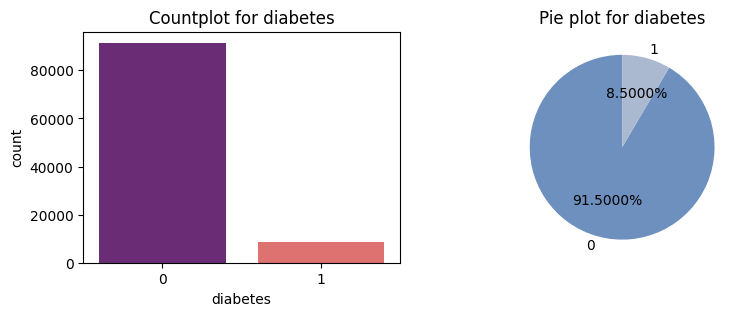

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=df['diabetes'],data=df ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for diabetes')
# Pie plot
data_counts = df['diabetes'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for diabetes')

Average range of people with diabetes in age 41

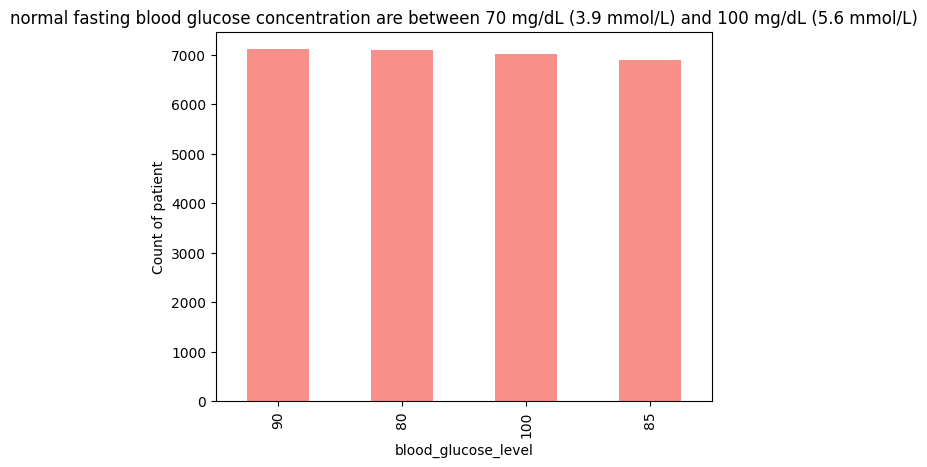

In [16]:
blood_glucose_level_above_70_and_less_than_100 = df[(df['blood_glucose_level'] <= 100) & (df['blood_glucose_level'] >= 70)]
blood_glucose_level_above_70_and_less_than_100['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')
plt.title('normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L)')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended ** **bold text

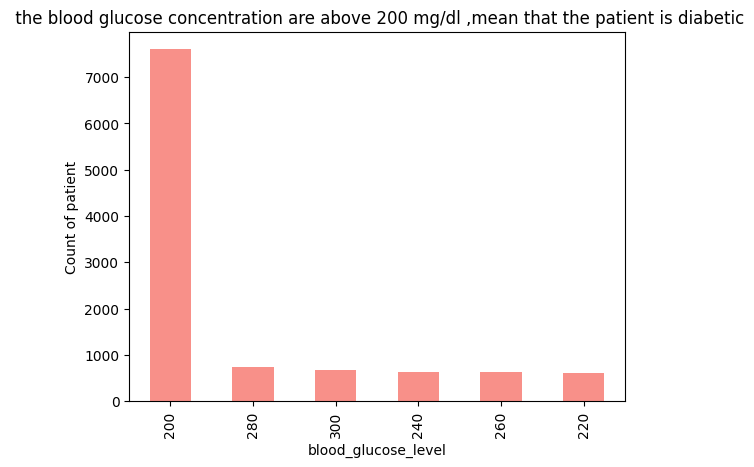

In [17]:
blood_glucose_level_above_200=df[df['blood_glucose_level']>=200]
blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')
plt.title(' the blood glucose concentration are above 200 mg/dl ,mean that the patient is diabetic')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

Is hypertension more common in males or females? A greater percentage of men (50%) have high blood pressure than women (44%)

***note that the number of females in this data set is 56161 ,and male is 39967 ***

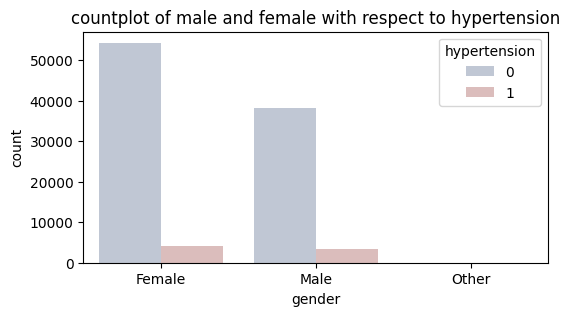

In [18]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df['gender'], hue=df['hypertension'], data=df ,palette='vlag' )
plt.title('countplot of male and female with respect to hypertension')
plt.show()

Worldwide, an estimated 17.7 million more men than women have diabetes mellitus.

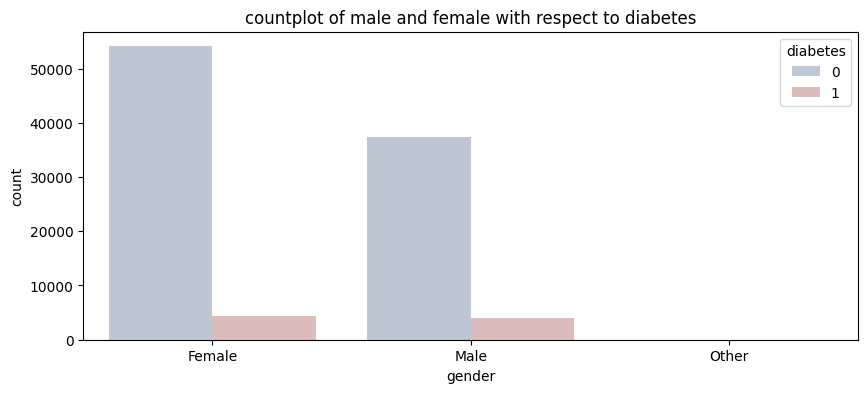

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['gender'], hue=df['diabetes'], data=df ,palette='vlag' )
plt.title('countplot of male and female with respect to diabetes')
plt.show()

** regular smokers have a 15-30% higher risk of developing diabetes**

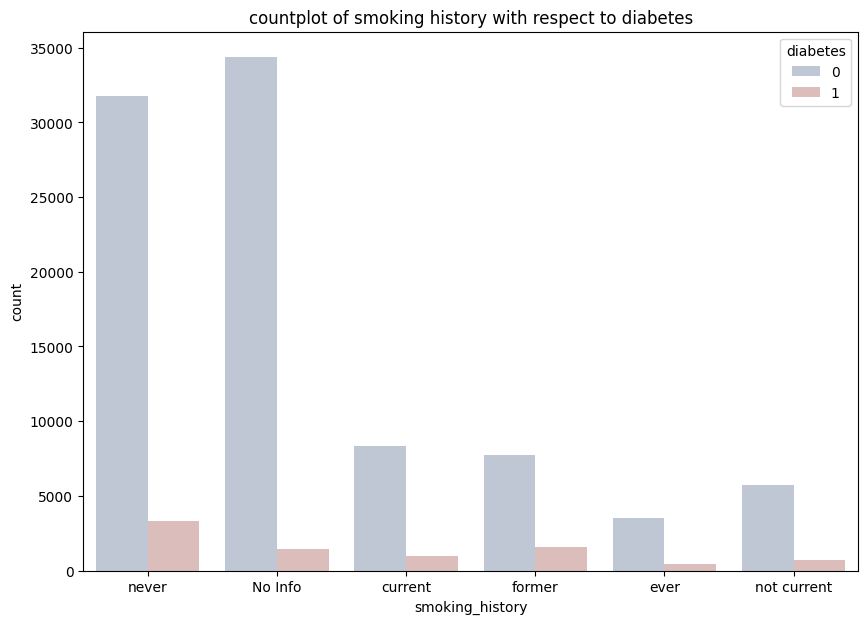

In [20]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df['smoking_history'], hue=df['diabetes'], data=df ,palette='vlag' )
plt.title('countplot of smoking history with respect to diabetes')
plt.show()

# Data preprocessing

In [21]:
label_encoder = LabelEncoder()

# Encode labels in column 'smoking_history'.
df['smoking_history']= label_encoder.fit_transform(df['smoking_history'])

df['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

In [22]:
dictGender={'Female':0,'Male':1,'Other':2}
df['gender']=df['gender'].map(dictGender)
df['gender'].value_counts()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

# Spliting Data

In [23]:
X=df.drop(['diabetes'],axis=1)
y=df['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Neural Network

In [43]:
kerasmodel=Sequential([
    Dense(16,activation='tanh'),
    #Dropout(0.1),
    Dense(256,activation='tanh'),
    Dense(128,activation='tanh'),
    Dense(64,activation='tanh'),
    Dense(32,activation='tanh'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [44]:
kerasmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [45]:
history=kerasmodel.fit(X_train,y_train,
                       validation_data=(X_test,y_test),
                       epochs=300,
                       batch_size=5000,
                       verbose=1,
                       callbacks=[EarlyStopping(
                       patience=20,
                       monitor='val_accuracy',#"Regression":"val_loss",
                       restore_best_weights=True)])

Epoch 1/300
14/14 [==============================] - 2s 63ms/step - loss: 0.3284 - accuracy: 0.9058 - val_loss: 0.2808 - val_accuracy: 0.9151
Epoch 2/300
14/14 [==============================] - 1s 52ms/step - loss: 0.2845 - accuracy: 0.9147 - val_loss: 0.2716 - val_accuracy: 0.9151
Epoch 3/300
14/14 [==============================] - 1s 47ms/step - loss: 0.2700 - accuracy: 0.9149 - val_loss: 0.2577 - val_accuracy: 0.9151
Epoch 4/300
14/14 [==============================] - 1s 46ms/step - loss: 0.2575 - accuracy: 0.9185 - val_loss: 0.2472 - val_accuracy: 0.9253
Epoch 5/300
14/14 [==============================] - 1s 53ms/step - loss: 0.2479 - accuracy: 0.9236 - val_loss: 0.2387 - val_accuracy: 0.9247
Epoch 6/300
14/14 [==============================] - 1s 46ms/step - loss: 0.2437 - accuracy: 0.9241 - val_loss: 0.2359 - val_accuracy: 0.9256
Epoch 7/300
14/14 [==============================] - 1s 46ms/step - loss: 0.2406 - accuracy: 0.9242 - val_loss: 0.2341 - val_accuracy: 0.9253
Epoch 

In [46]:
print(kerasmodel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (5000, 16)                144       
                                                                 
 dense_7 (Dense)             (5000, 256)               4352      
                                                                 
 dense_8 (Dense)             (5000, 128)               32896     
                                                                 
 dense_9 (Dense)             (5000, 64)                8256      
                                                                 
 dense_10 (Dense)            (5000, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (5000, 32)                0         
                                                                 
 dense_11 (Dense)            (5000, 1)                

In [47]:
y_pred=kerasmodel.predict(X_test)

938/938 [==============================] - 2s 2ms/step


In [48]:
kerasmodel.save('KerasModelBinaryClassification.model')

In [49]:
NewKerasModel=load_model('KerasModelBinaryClassification.model')

In [50]:
ModelLoss ,ModelAccuracy=NewKerasModel.evaluate(X_test,y_test)
print(f"Loss : {ModelLoss} ")
print(f"Accuracy : {ModelAccuracy}")

938/938 [==============================] - 2s 2ms/step - loss: 0.0966 - accuracy: 0.9670
Loss : 0.09660884737968445 
Accuracy : 0.967033326625824


In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Visalustion performance Model

<function matplotlib.pyplot.show(close=None, block=None)>

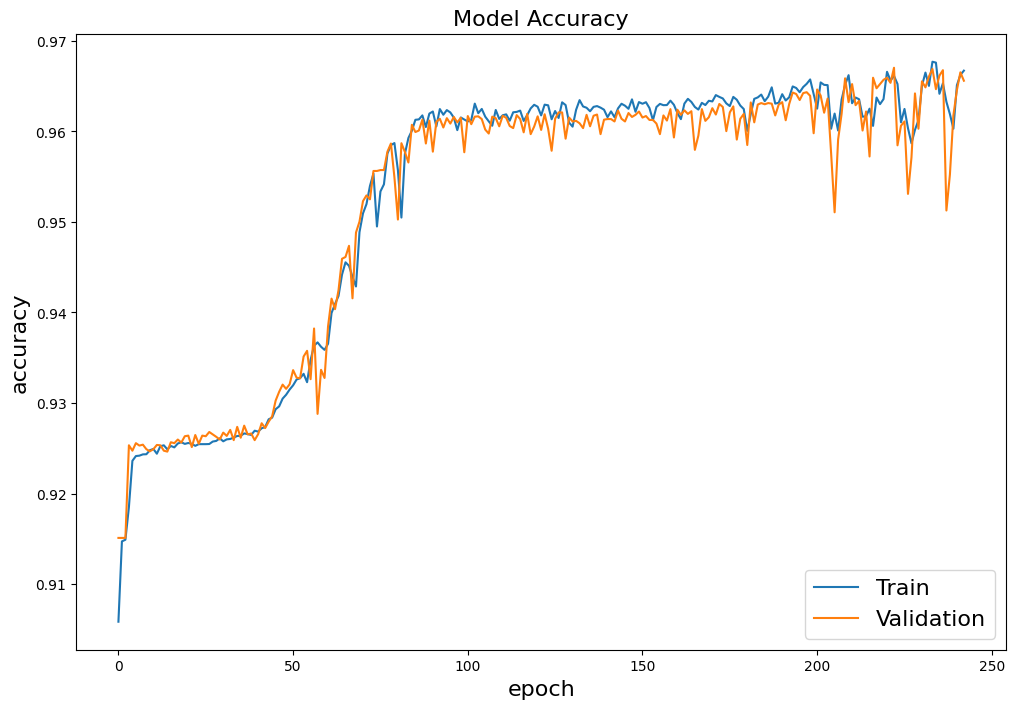

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='lower right',fontsize=16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

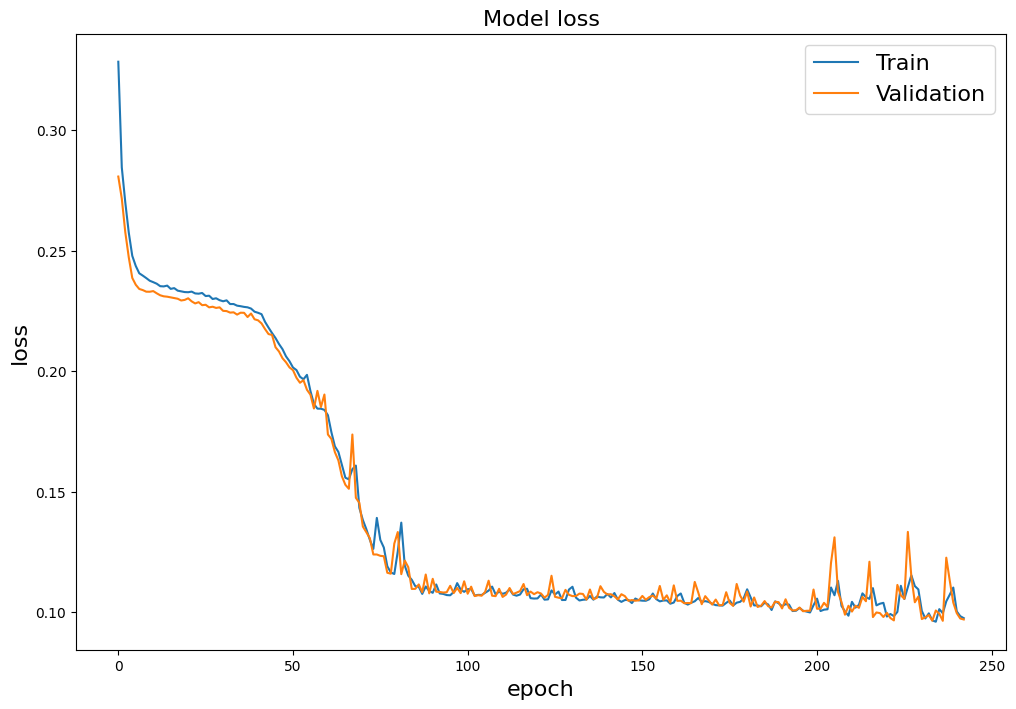

In [53]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss",fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.xlabel('epoch',fontsize=16)
plt.legend(['Train','Validation'],loc='upper right',fontsize=16)
plt.show

# Evaluation

In [54]:
len(y_test),len(y_pred)

(30000, 30000)

In [55]:
y_pred

array([[6.2639505e-04],
       [1.7824055e-04],
       [2.5828322e-03],
       ...,
       [4.2680886e-02],
       [2.0539060e-01],
       [1.4366904e-04]], dtype=float32)

In [56]:
y_pred=[np.round(i[0]) for i in y_pred]
y_pred

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [57]:
CM=confusion_matrix(y_test,y_pred)
print("confusion_matrix : \n",CM)

confusion_matrix : 
 [[27358    95]
 [  894  1653]]


<function matplotlib.pyplot.show(close=None, block=None)>

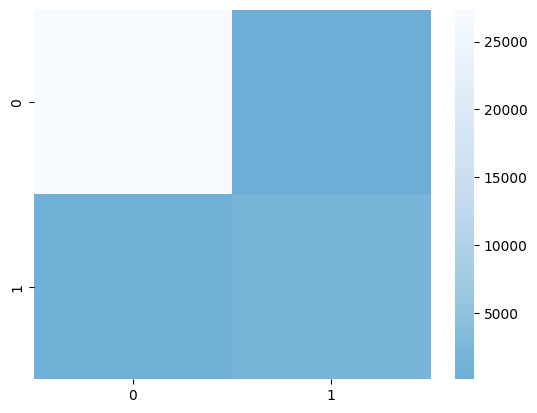

In [58]:
sns.heatmap(CM,center=True,cmap="Blues_r")
plt.show

In [59]:
Classification_Report=classification_report(y_test,y_pred)
print("classification report is : \n",Classification_Report)

classification report is : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       0.95      0.65      0.77      2547

    accuracy                           0.97     30000
   macro avg       0.96      0.82      0.88     30000
weighted avg       0.97      0.97      0.96     30000

